In [2]:
import sys
import os
from mpi4py import MPI
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'
plt.style.use('JFM')

import floatpy.readers.padeops_reader as por
import floatpy.readers.parallel_reader as pdr
import floatpy.utilities.reduction as red
import floatpy.derivatives.compact.compact_derivative as cd
import scripts.statistics as stats

dtheta_inc = { #Brown & Roshko Fig. 15
    0: 0.1*0.24026898560883186,
    1: 0.1*0.180376365676346,
    7: 0.1*0.1338770483624053
}

dtheta_rr7 = {
    0.2: 0.328048356838,
    0.8: 0.204785171464,
    2.0: 0.118529228172
}
# dtheta_rr_7 = {
#     0.2: 0.41845482067134454,
#     0.8: 0.2876450364869774,
#     2.0: 0.1519875160790215
# }

# PadeOps
dtheta = {
    0.2: 0.8313409423823516,
    0.4: 0.6704432477570811,
    0.8: 0.456550549109,
    1.2: 0.3444444444,
    1.6: 0.291629202186,
    2.0: 0.251843521922}

([], <a list of 0 Text yticklabel objects>)

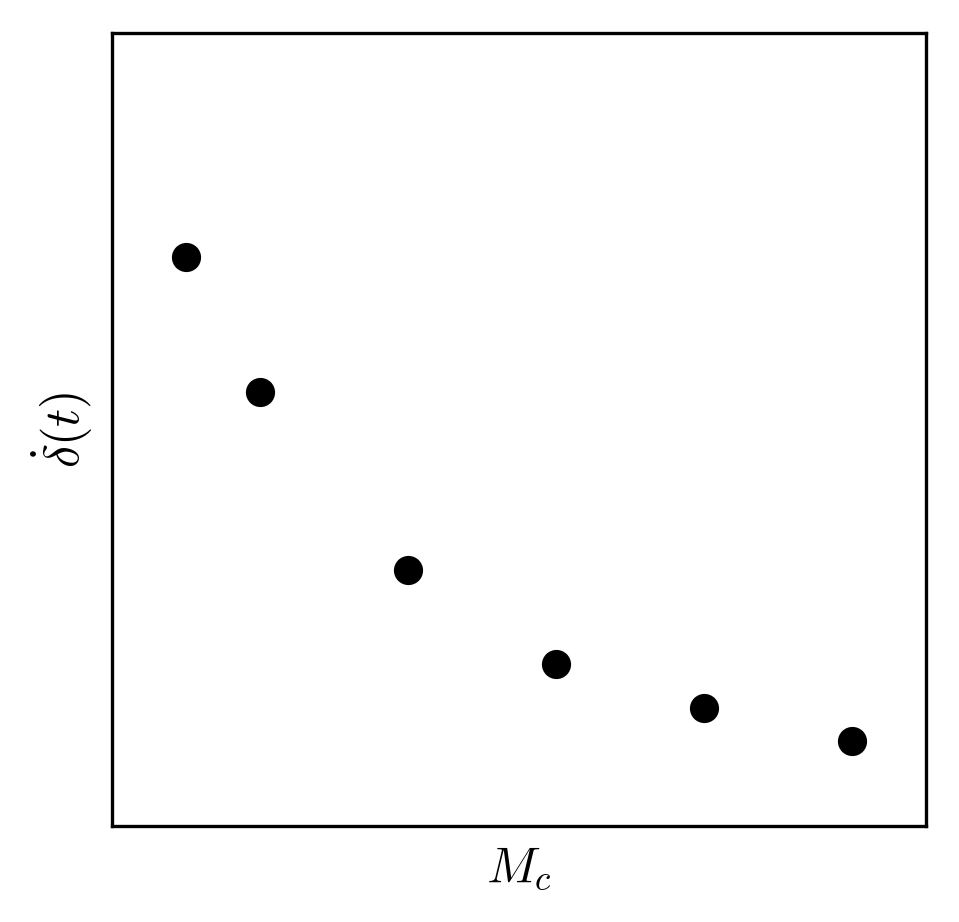

In [26]:
# Density ratio comparison

def merge_dicts(old1,old2):
    new = {}
    for i in range(3):
        key = old1.keys()[i]
        v1 = old1.values()[i]
        v2 = old2.values()[i]
        std = np.std([v1,v2]) 
        new[key] = [(v1+v2)/2.,std]
    return new

rr = dtheta_rr7#merge_dicts(dtheta_rr7,dtheta_rr_7)

plt.figure(figsize=(3.5,3.5),dpi=300)
# Pantano
# plt.plot(0.7,0.36,'^',color='C3',label='Pantano (2001)')
plt.scatter(dtheta.keys(),dtheta.values(),marker='o',color='k',label='$\dot{\delta}/\dot{\delta}_{inc}$')
# plt.scatter(rr.keys(),rr.values(),marker='o',label='s=7')

plt.xlabel('$M_c$')
plt.ylabel('$\dot{\delta}(t)$')
plt.xlim([0,2.2])
plt.ylim([0.15,1.1])
plt.xticks([])
plt.yticks([])
